In [1]:
import pandas as pd

In [2]:
gstock = pd.read_csv('sample_data/aapl.csv')
gstock.head()

,Date,Open,High,Low,Close,Volume
0,7/21/2014,94.99,95.00,93.72,93.94,38887700
1,7/18/2014,93.62,94.74,93.02,94.43,49898600
2,7/17/2014,95.03,95.28,92.57,93.09,57152000
3,7/16/2014,96.97,97.10,94.74,94.78,53396300
4,7/15/2014,96.80,96.85,95.03,95.32,45477900


In [3]:
gstock.shape

(3659, 6)

In [4]:
gstock = gstock[['Date','Open','Close']]
gstock['Date'] = pd.to_datetime(gstock['Date'])
gstock.set_index('Date',inplace=True)
gstock.head()

,Open,Close
Date,,
2014-07-21,94.99,93.94
2014-07-18,93.62,94.43
2014-07-17,95.03,93.09
2014-07-16,96.97,94.78
2014-07-15,96.80,95.32


In [5]:
import matplotlib.pyplot as plt

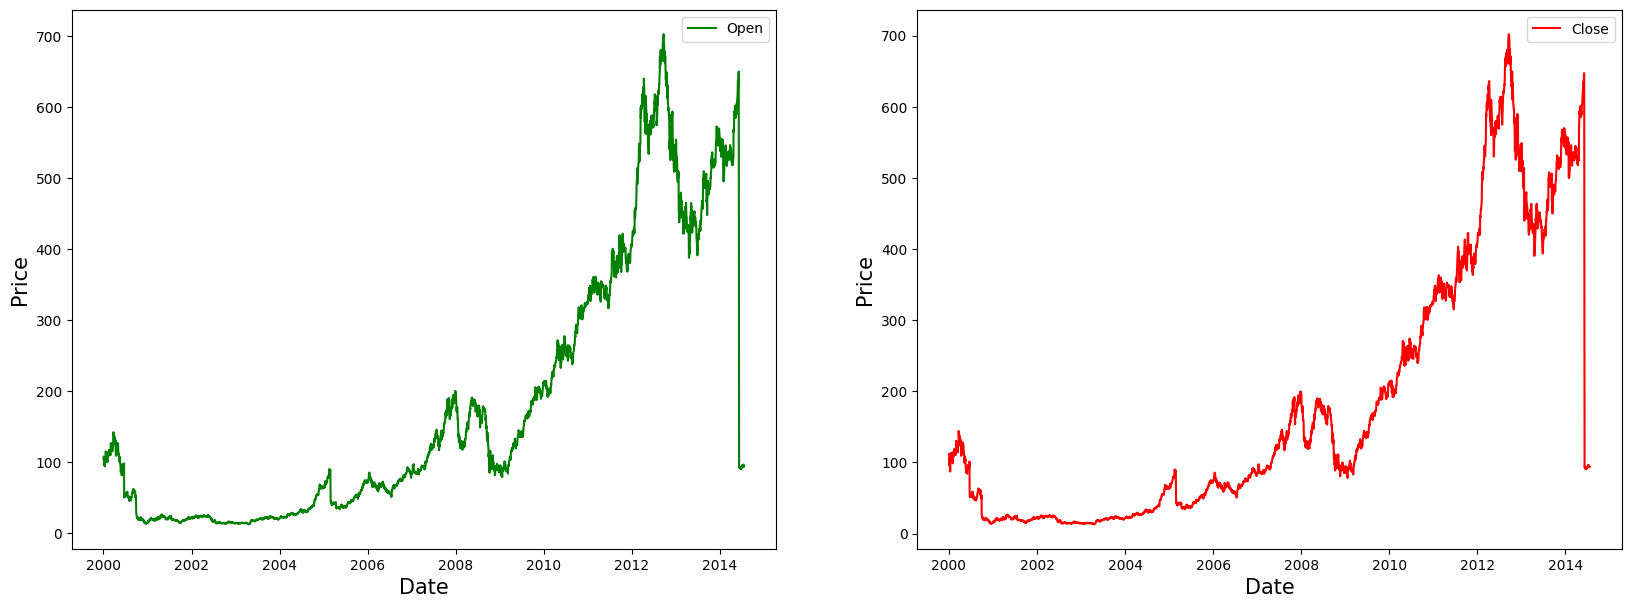

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].plot(gstock['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(gstock['Close'], label='Close', color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fig.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
gstock[gstock.columns] = mm.fit_transform(gstock)


In [31]:
training_size = round(len(gstock)*0.8)
val_size = round(len(gstock)*0.1)
train_data = gstock[:training_size]
test_data = gstock[training_size:training_size+val_size]
val_data = gstock[training_size+val_size:]


In [32]:
import numpy as np

In [33]:
def create_sequence(dataset):
    sequences = []
    labels = []

    start_idx = 0

    for stop_idx in range(50, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1

    return (np.array(sequences), np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
val_seq, val_label = create_sequence(val_data)




In [47]:
train_seq.shape

(2877, 50, 2)

In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [35]:
model  = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(train_seq, train_label, epochs=40, validation_data=(test_seq, test_label), verbose=1)
val_predicted = model.predict(val_seq)
val_inverse_predicted = mm.inverse_transform(val_predicted)

Epoch 1/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0453 - mean_absolute_error: 0.1181 - val_loss: 4.1203e-05 - val_mean_absolute_error: 0.0061
Epoch 2/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 5.3056e-04 - mean_absolute_error: 0.0148 - val_loss: 1.4535e-05 - val_mean_absolute_error: 0.0034
Epoch 3/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 5.0318e-04 - mean_absolute_error: 0.0144 - val_loss: 2.6896e-05 - val_mean_absolute_error: 0.0048
Epoch 4/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 4.2084e-04 - mean_absolute_error: 0.0135 - val_loss: 6.9502e-05 - val_mean_absolute_error: 0.0079
Epoch 5/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 4.9775e-04 - mean_absolute_error: 0.0147 - val_loss: 1.4885e-05 - val_mean_absolute_error: 0.0035
Epoch 6/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 4.6330e-04 - mean_absolute_error: 0.0139 - val_loss: 7.0920e-06 - val_mean_absolute_error: 0.0023
Epoch 7/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 3.8

In [37]:
gstock

,Open,Close
Date,,
2014-07-21,0.118941,0.117304
2014-07-18,0.116953,0.118015
2014-07-17,0.118999,0.116070
2014-07-16,0.121813,0.118523
2014-07-15,0.121566,0.119307
...,...,...
2000-01-07,0.121131,0.125374
2000-01-06,0.135099,0.118842
2000-01-05,0.131647,0.131905


In [38]:
val_inverse_predicted

array([[ 19.606314 ,  19.955471 ],
       [ 19.429585 ,  19.786673 ],
       [ 19.460983 ,  19.829597 ],
       [ 19.66429  ,  20.040302 ],
       [ 19.910006 ,  20.27928  ],
       [ 20.152132 ,  20.508858 ],
       [ 20.378931 ,  20.719442 ],
       [ 20.603418 ,  20.934996 ],
       [ 20.777617 ,  21.095737 ],
       [ 20.733023 ,  21.028286 ],
       [ 20.45849  ,  20.733833 ],
       [ 20.12465  ,  20.398062 ],
       [ 19.772158 ,  20.048452 ],
       [ 19.36705  ,  19.646507 ],
       [ 19.10488  ,  19.402882 ],
       [ 18.83708  ,  19.140179 ],
       [ 18.583181 ,  18.890007 ],
       [ 18.38213  ,  18.698505 ],
       [ 18.3623   ,  18.693779 ],
       [ 18.483036 ,  18.82452  ],
       [ 18.730104 ,  19.076761 ],
       [ 18.99172  ,  19.331753 ],
       [ 19.091429 ,  19.411114 ],
       [ 18.959112 ,  19.25344  ],
       [ 18.648132 ,  18.922731 ],
       [ 18.35354  ,  18.629936 ],
       [ 18.149414 ,  18.436113 ],
       [ 18.018276 ,  18.314587 ],
       [ 17.889608 ,

In [39]:
pd.DataFrame(val_inverse_predicted,columns=['open_predicted','close_predicted'])

,open_predicted,close_predicted
0,19.606314,19.955471
1,19.429585,19.786673
2,19.460983,19.829597
3,19.664289,20.040302
4,19.910006,20.279280
...,...,...
311,93.624832,94.563759
312,92.941727,93.941444
313,93.216667,94.288559
314,94.218674,95.314857


In [41]:
# Merging actual and predicted data for better visualization
gs_slic_data = pd.concat([gstock.iloc[-316:].copy(),pd.DataFrame(val_inverse_predicted,columns=['open_predicted','close_predicted'],index=gstock.iloc[-316:].index)], axis=1)


In [42]:
gs_slic_data

,Open,Close,open_predicted,close_predicted
Date,,,,
2001-04-03,0.012141,0.010334,19.606314,19.955471
2001-04-02,0.013200,0.012294,19.429585,19.786673
2001-03-30,0.013867,0.012990,19.460983,19.829597
2001-03-29,0.012735,0.013658,19.664289,20.040302
2001-03-28,0.013185,0.013135,19.910006,20.279280
...,...,...,...,...
2000-01-07,0.121131,0.125374,93.624832,94.563759
2000-01-06,0.135099,0.118842,92.941727,93.941444
2000-01-05,0.131647,0.131905,93.216667,94.288559


In [43]:

gs_slic_data[['Open','Close']] = mm.inverse_transform(gs_slic_data[['Open','Close']])

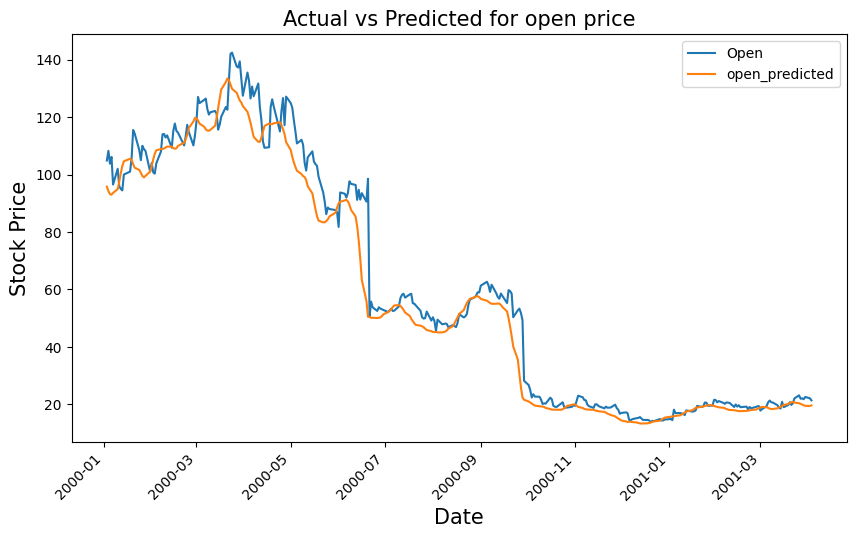

In [44]:
import matplotlib.pyplot as plt

# Plotting the 'open' and 'open_predicted' columns from the DataFrame
gs_slic_data[['Open', 'open_predicted']].plot(figsize=(10, 6))

# Customizing the plot with labels, title, and rotation
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for open price', size=15)

# Display the plot
plt.show()


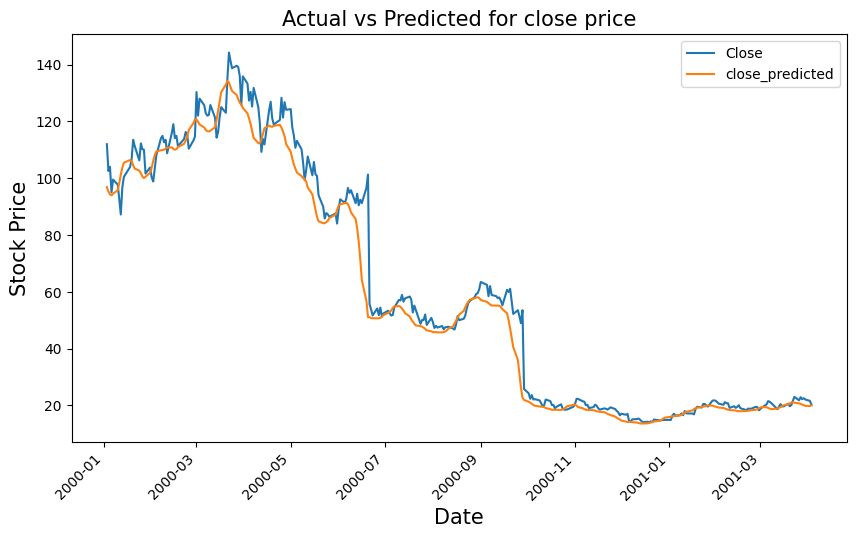

In [48]:

# Plotting the 'open' and 'open_predicted' columns from the DataFrame
gs_slic_data[['Close', 'close_predicted']].plot(figsize=(10, 6))

# Customizing the plot with labels, title, and rotation
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for close price', size=15)

# Display the plot
plt.show()
